cost after iteration 0: 0.806017
cost after iteration 1000: 0.279818
cost after iteration 2000: 0.268149
cost after iteration 3000: 0.261448
cost after iteration 4000: 0.257059


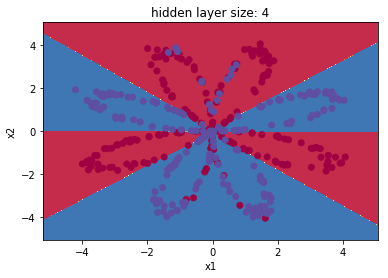

accuracy: 90.75%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV as LRCV


def load_planar_dataset():
    np.random.seed(1)
    m = 400 # 样本数量
    N = int(m/2) # 每个类别的样本量
    D = 2 # 维度数
    X = np.zeros((m, D)) # features x1,x2
    Y = np.zeros((m, 1), dtype='uint8') # labels red:0 blue:1
    a = 4 # 花的最大长度
    
    for j in range(2):
        ix = range(N*j, N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T
    return X,Y


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

    
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1.0/(1+np.exp(-Z2))
    cache = {"Z1":Z1,"Z2":Z2, "A1":A1, "A2":A2}
    return A2, cache


def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2), (1-Y))
    cost = -(1.0/m) * np.sum(logprobs)
    return cost


def backward_propagation(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    m = Y.shape[1]
    dZ2 = A2 - Y
    dW2 = 1.0/m*np.dot(dZ2, A1.T)
    db2 = 1.0/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1, 2))
    dW1 = 1.0/m*np.dot(dZ1, X.T)
    db1 = 1.0/m*np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1":dW1, "db1":db1, "dW2":dW2, "db2":db2}
    return grads

def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    W1 = W1-learning_rate*dW1
    W2 = W2-learning_rate*dW2
    b1 = b1-learning_rate*db1
    b2 = b2-learning_rate*db2
    
    parameters = {"W1":W1,"W2":W2,"b1":b1,"b2":b2}
    return parameters


def nn_model(X, Y, n_h, num_iter, print_cost=False):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1":W1,"W2":W2,"b1":b1,"b2":b2}
    
    for i in range(num_iter):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(X, Y, cache, parameters)
        parameters = update_parameters(parameters,grads, 1.2)
        if print_cost and i%1000==0:
            print("cost after iteration %i: %f" % (i,cost))
    return parameters


def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    return predictions

def print_accuracy(predictions, Y):
    acc = float((np.dot(Y,predictions.T)
                +np.dot(1-Y, 1-predictions.T))/float(Y.size)*100)

    print('accuracy: {}%'.format(acc))


if __name__ == '__main__':
    X, Y = load_planar_dataset()
#     plt.scatter(X[0,:], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral)
#     plt.show()

#     clf = LRCV()
#     clf.fit(X.T, Y.T)
#     LR_predictions = clf.predict(X.T)
#     print(float((np.dot(Y,LR_predictions) 
#                  + np.dot(1-Y,1-LR_predictions))/float(Y.size)))

#     plot_decision_boundary(lambda x: clf.predict(x), X, Y)
#     plt.title("Logistic Regression")
#     plt.show()

    parameters = nn_model(X, Y, 2, 5000, True)
    plot_decision_boundary(lambda x:predict(parameters, x.T), X, Y)
    plt.title("hidden layer size: 4")
    plt.show()
    predictions = predict(parameters, X)
    print_accuracy(predictions, Y)
    
#     plt.figure(figsize=(16,32))
#     hidden_layer_sizes = [1,2,3,4,5,20,50]
#     for i, n_h in enumerate(hidden_layer_sizes):
#         plt.subplot(5,2,i+1)
#         plt.title("hidden layer size:%d" % n_h)
#         parameters = nn_model(X,Y,n_h,5000,False)
#         plot_decision_boundary(lambda x:predict(parameters,x.T), X,Y)
#         predictions = predict(parameters,X)
#         print_accuracy(predictions,Y)
#     plt.show()